# 📘 Simulated A/B Testing and Evaluation
---
This notebook contains the code and explanation for **Simulated A/B Testing and Evaluation**.

In [1]:
# Your code will go here
import pandas as pd
import numpy as np

# Load dataset
df = pd.read_csv("dummy_telkomsel_data.csv")

# Filter target segment: Segment A (Target konversi 4G)
segment_a = df[df['segment'] == 'A'].copy()
print(f"Total customers in Segment A: {len(segment_a)}")
segment_a.head()

Total customers in Segment A: 503


,user_id,age,city,monthly_usage_gb,device_type,tenure_months,is_4g,segment
23,1023,29,Medan,3.41,mid-range,32,0,A
38,1038,21,Jakarta,6.57,mid-range,26,0,A
41,1041,26,Makassar,6.46,mid-range,22,0,A
47,1047,25,Surabaya,4.10,mid-range,23,0,A
53,1053,21,Bandung,7.25,mid-range,33,0,A


In [2]:
# Tambahkan kolom grup secara acak (treatment vs control)
np.random.seed(42)
segment_a['group'] = np.random.choice(['treatment', 'control'], size=len(segment_a))

# Simulasi hasil kampanye: treatment lebih tinggi konversinya
segment_a['converted'] = 0
segment_a.loc[(segment_a['group'] == 'treatment') & (np.random.rand(len(segment_a)) < 0.28), 'converted'] = 1
segment_a.loc[(segment_a['group'] == 'control') & (np.random.rand(len(segment_a)) < 0.16), 'converted'] = 1

segment_a[['group', 'converted']].value_counts(normalize=True)

group      converted
control    0            0.411531
treatment  0            0.361829
           1            0.129225
control    1            0.097416
Name: proportion, dtype: float64

In [3]:
# Hitung konversi per grup
ab_summary = segment_a.groupby('group')['converted'].agg(['count', 'sum', 'mean'])
ab_summary.rename(columns={'mean': 'conversion_rate'}, inplace=True)
ab_summary


,count,sum,conversion_rate
group,,,
control,256,49,0.191406
treatment,247,65,0.263158


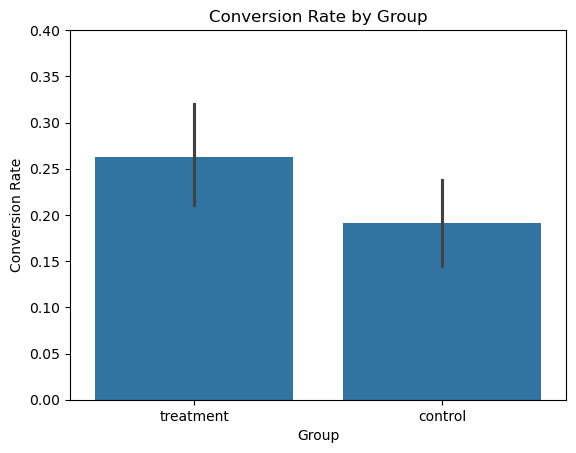

In [4]:
import seaborn as sns
import matplotlib.pyplot as plt

sns.barplot(data=segment_a, x='group', y='converted', estimator=np.mean)
plt.title('Conversion Rate by Group')
plt.ylabel('Conversion Rate')
plt.xlabel('Group')
plt.ylim(0, 0.4)
plt.show()

In [7]:
from scipy.stats import chi2_contingency

contingency = pd.crosstab(segment_a['group'], segment_a['converted'])
chi2, p, dof, expected = chi2_contingency(contingency)

print("Chi-square:", chi2)
print("p-value:", p)
print("Jika p < 0.05, artinya perbedaan antara grup treatment dan control signifikan secara statistik.")

Chi-square: 3.294424906963063
p-value: 0.06951544693735241
Jika p < 0.05, artinya perbedaan antara grup treatment dan control signifikan secara statistik.
